In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats

# 1. EXPLORATORY ANALYSIS

## 1.1 Description of the dataset
+ Variable types (qualitative, discrete, continuous...)
+ Variable description (df.describe())

In [2]:
data = pd.read_csv('insurance.csv', sep=",", header=0)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In our data frame we have 7 variables:
+ 2 'int64': age, children
+ 3 'object': sex, smoker, region
+ 2 'float64': loads, bmi


'int64' we mean numeric characters, and the 64 refers to the memory used to store the character.


'object' we mean a kind of tag or alias to refer to the object.
We transform variables of type 'object' to categorical in the next step.


'floats' we mean variables with real positive or negative numbers, that is, with decimals.

### Variable types
Regarding the types of variables we have:
+ age: discrete quantitative
+ sex: dichotomous qualitative
+ bmi: continuous quantitative
+ children: discrete quantitative
+ smoker: dichotomous qualitative
+ region: qualitative categorical
+ charges: continuous quantitative

In [4]:
data_objects = data.columns[data.dtypes == 'object'] #Saco todos los nombres de las columnas
data[data_objects] = data[data_objects].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### Variable description

In [39]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 1.2 VARIABLE REPRESENTATION

### Plots of continuous

### AGE

<AxesSubplot:xlabel='age', ylabel='Count'>

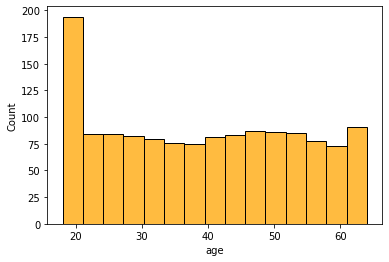

In [5]:
sns.histplot(data = data, x = 'age', bins=15, color = "orange")

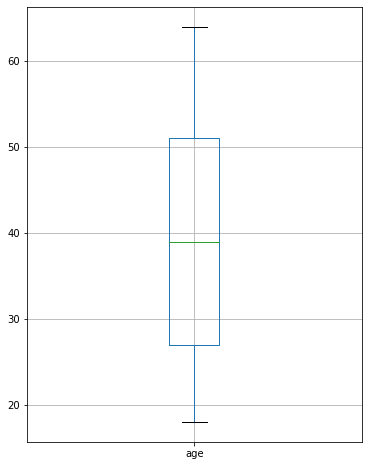

In [6]:
getPlot = data.boxplot(column='age', figsize=(6, 8))

### BMI

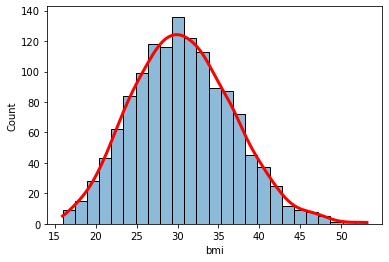

In [7]:
dens_plot_weight = sns.histplot(data = data, x = 'bmi', kde=True)
dens_plot_weight.lines[0].set_color('red')
dens_plot_weight.lines[0].set_linewidth(3)

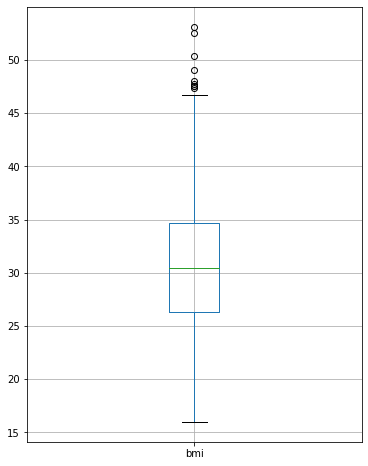

In [8]:
getPlot = data.boxplot(column='bmi', figsize=(6, 8))

### CHILDREN

<AxesSubplot:xlabel='children', ylabel='Count'>

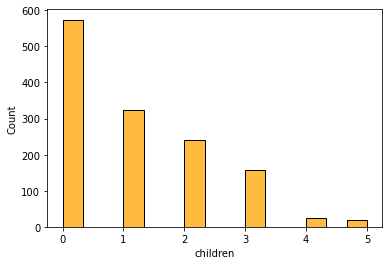

In [9]:
sns.histplot(data = data, x = 'children', bins=15, color = "orange")

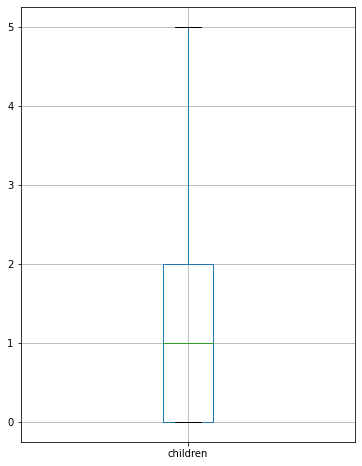

In [10]:
getPlot = data.boxplot(column='children', figsize=(6, 8))

### CHARGES

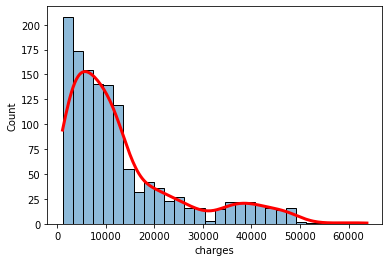

In [11]:
dens_plot_weight = sns.histplot(data = data, x = 'charges', kde=True)
dens_plot_weight.lines[0].set_color('red')
dens_plot_weight.lines[0].set_linewidth(3)

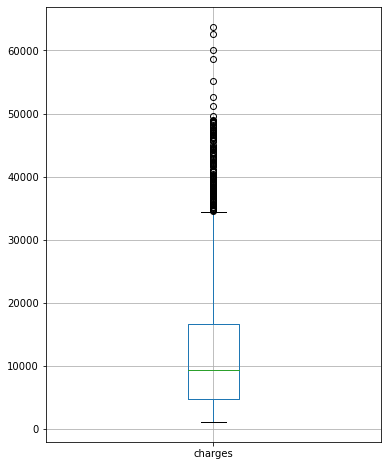

In [12]:
getPlot = data.boxplot(column='charges', figsize=(6, 8))

  ## Plot of discrete variables :
  - For factors :  
    - Frecuency tables (absolute and relative).  
    - Grafics (bar plot).  

## Frecuency tables

### Sex

In [13]:
data['sex'].unique() #Tenemos dos tipos de genero

['female', 'male']
Categories (2, object): ['female', 'male']

In [14]:
AbsFreq_Sex = data['sex'].value_counts().sort_index()
AbsFreq_Sex

female    662
male      676
Name: sex, dtype: int64

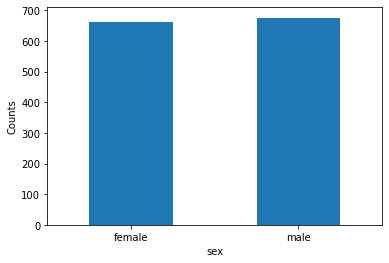

In [15]:
plot = AbsFreq_Sex.plot.bar(rot=0, xlabel='sex', ylabel ='Counts')

In [16]:
RelFreq_Sex = data['sex'].value_counts(normalize=True).sort_index()
RelFreq_Sex

female    0.494768
male      0.505232
Name: sex, dtype: float64

### Smoker

In [17]:
data['smoker'].unique()

['yes', 'no']
Categories (2, object): ['yes', 'no']

In [18]:
AbsFreq_Smoker = data['smoker'].value_counts().sort_index()
AbsFreq_Smoker

no     1064
yes     274
Name: smoker, dtype: int64

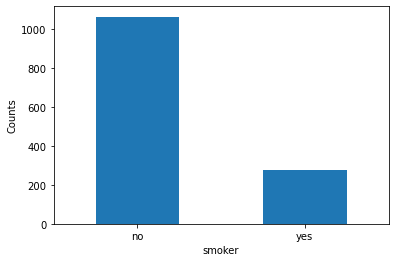

In [19]:
plot = AbsFreq_Smoker.plot.bar(rot=0, xlabel='smoker', ylabel ='Counts')

### Region

In [20]:
data['region'].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['southwest', 'southeast', 'northwest', 'northeast']

In [21]:
AbsFreq_Region = data['region'].value_counts().sort_index()
AbsFreq_Region

northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

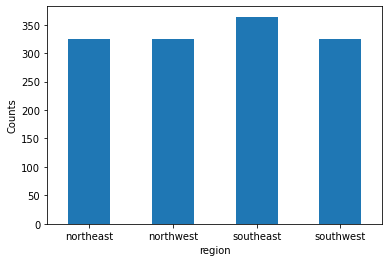

In [22]:
plot = AbsFreq_Region.plot.bar(rot=0, xlabel='region', ylabel ='Counts')

## Identification of outliers

In [43]:
# FUNCIÓN PARA OBTENER OUTLIERS
def outliers (datos):
    df_iqr = stats.iqr(datos)
    print(f"Interquartile range: {df_iqr}")
    # Para localizar el primer y tercer cuartil.
    df_q1, df_q3 = np.quantile(datos, [0.25, 0.75])
 
    # Limites de los valores atípicos
    cut_low = df_q1 - 1.5 * df_iqr
    cut_high = df_q3 + 1.5 * df_iqr
 
    print("Lower and upper outlier limits:", cut_low, ", ", cut_high)
 
    # Obtenemos de nuestro dataset todos los valores atípicos segun los limites calculados
    df_outliers = data.loc[(datos < cut_low) | (datos > cut_high)]

    # Representación mediante boxpots (sección gráficos)

    print('We have a total of', len(df_outliers), 'outliers')

    return df_outliers

In [44]:
# Outliers
age_outl = outliers(data.age)
age_outl

Interquartile range: 24.0
Lower and upper outlier limits: -9.0 ,  87.0
We have a total of 0 outliers


,age,sex,bmi,children,smoker,region,charges


In [45]:
# Outliers
bmi_outl = outliers(data.bmi)
bmi_outl

Interquartile range: 8.3975
Lower and upper outlier limits: 13.7 ,  47.290000000000006
We have a total of 9 outliers


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [26]:
# Outliers
children_outl = outliers(data.children)
children_outl

Rango intercuartílico: 2.0
Lower and upper outlier limits: -3.0 ,  5.0
We have a total of 0 outliers


,age,sex,bmi,children,smoker,region,charges


In [27]:
# Outliers
charges_outl = outliers(data.charges)
charges_outl

Rango intercuartílico: 11899.625365
Lower and upper outlier limits: -13109.1508975 ,  34489.350562499996
We have a total of 139 outliers


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600
